In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
infection = pd.read_csv('Classeur.csv', sep=";",index_col='Date',parse_dates=True)

(35, 1) (35, 1) (35, 1)


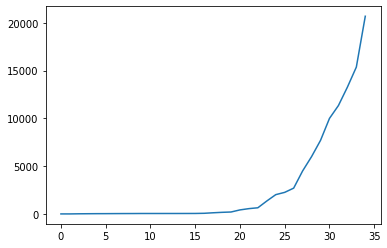

In [3]:
infection.head()
x=infection['Infected']
y=infection['Dead']
z=infection['Days']
x = x.values.reshape(x.shape[0],1)
y = y.values.reshape(y.shape[0],1)
z = z.values.reshape(z.shape[0],1)
plt.plot(z,x, markersize=4)
print(x.shape,y.shape,z.shape)

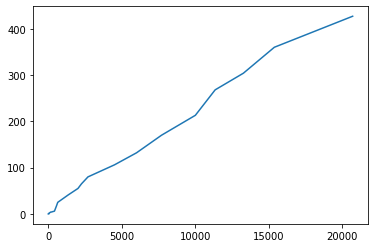

In [4]:
plt.plot(x,y, markersize=4)

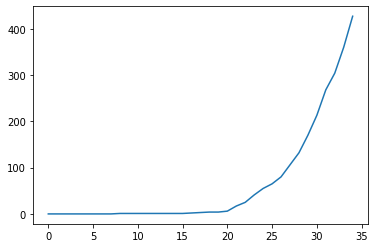

In [5]:
plt.plot(z,y, markersize=4)

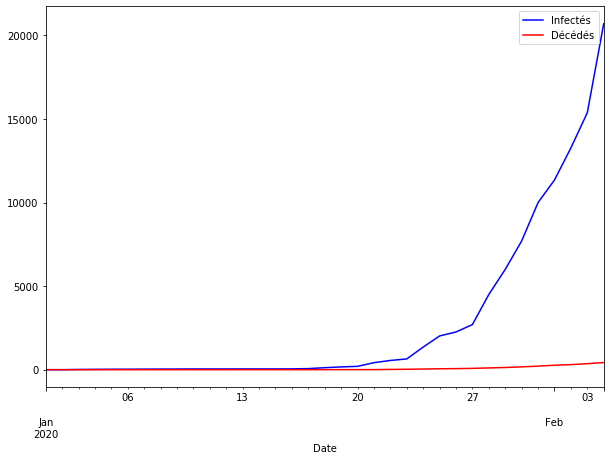

In [6]:
plt.figure(figsize=(10,7))
infection['Infected'].plot(label="Infectés",color='blue')
infection['Dead'].plot(label="Décédés",color='red')
plt.legend()

In [7]:
Z = np.hstack((z**2,np.ones(z.shape)))
#X
#Y = np.hstack((y,np.ones(z.shape)))
Z

array([[0.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00],
       [4.000e+00, 1.000e+00],
       [9.000e+00, 1.000e+00],
       [1.600e+01, 1.000e+00],
       [2.500e+01, 1.000e+00],
       [3.600e+01, 1.000e+00],
       [4.900e+01, 1.000e+00],
       [6.400e+01, 1.000e+00],
       [8.100e+01, 1.000e+00],
       [1.000e+02, 1.000e+00],
       [1.210e+02, 1.000e+00],
       [1.440e+02, 1.000e+00],
       [1.690e+02, 1.000e+00],
       [1.960e+02, 1.000e+00],
       [2.250e+02, 1.000e+00],
       [2.560e+02, 1.000e+00],
       [2.890e+02, 1.000e+00],
       [3.240e+02, 1.000e+00],
       [3.610e+02, 1.000e+00],
       [4.000e+02, 1.000e+00],
       [4.410e+02, 1.000e+00],
       [4.840e+02, 1.000e+00],
       [5.290e+02, 1.000e+00],
       [5.760e+02, 1.000e+00],
       [6.250e+02, 1.000e+00],
       [6.760e+02, 1.000e+00],
       [7.290e+02, 1.000e+00],
       [7.840e+02, 1.000e+00],
       [8.410e+02, 1.000e+00],
       [9.000e+02, 1.000e+00],
       [9.610e+02, 1.000e+00],
       [

In [11]:
theta = np.random.randn(2,1)
print(theta)

[[0.54421073]
 [0.75870745]]


In [12]:
def model(X,theta):
    return X.dot(theta)

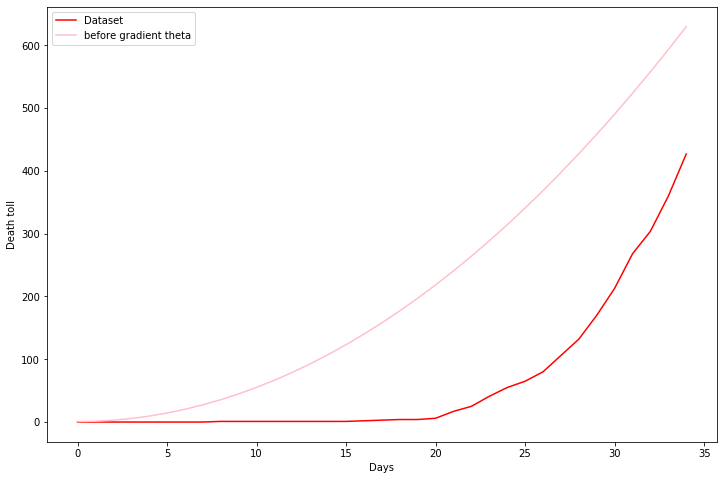

In [13]:
plt.figure(figsize=(12,8))
plt.xlabel('Days')
plt.ylabel('Death toll')
plt.plot(z,y, c='red', label='Dataset')

plt.plot(z,model(Z,theta), c='pink',label='before gradient theta')
plt.legend()

In [14]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [15]:
print(cost_function(Z,y,theta))

16591.77577219804


In [16]:
def grad(X,y,theta):
    m = len(y)
    return 1/m*X.T.dot(model(X,theta)- y)

In [17]:
print(grad(Z,y,theta))

[[90891.64002008]
 [  148.11653034]]


In [20]:
def gradient_descent(X,y,theta, learningRate,n_iterations):
    theta_history = np.zeros((n_iterations,2))
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learningRate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
        theta_history[i,:]=theta.T
    return theta, cost_history,theta_history

In [28]:
learning_rate = 0.000003
n_iterations=1000
theta_final, cost_history, theta_history = gradient_descent(Z,y,theta,learning_rate,n_iterations)

In [29]:
print(theta_final)
print(theta_history.shape)

[[0.21863388]
 [0.69594924]]
(1000, 2)


In [30]:
prediction=model(Z,theta_final)

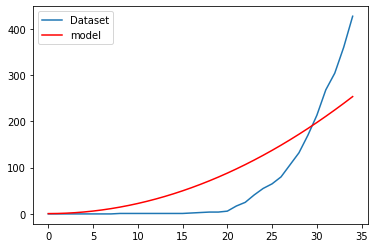

In [31]:
plt.plot(z,y, label='Dataset')
plt.plot(z,prediction,color='r',label='model')
plt.legend()

In [36]:
#y=A*r**x
testpred = theta_final.item(0)*(32**2)+theta_final.item(1) # Number of death= theta(1)*nb of days + theta(0)
testpred

224.5770423006944

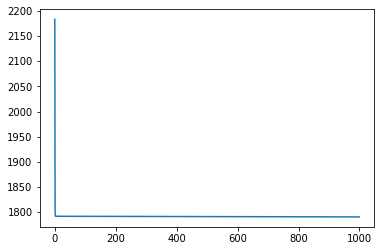

In [37]:
plt.plot(range(n_iterations),cost_history)

In [38]:
def coef_deter(y,pred):
    u= ((y-pred)**2).sum()
    v= ((y-y.mean())**2).sum()
    return 1 - u/v

In [39]:
coef_deter(y,prediction) # Not linear problem 0.45 

0.7187475985849203

In [40]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [41]:
reg = LinearRegression()
reg2 = LinearRegression()

In [42]:
reg.fit(x,y)
reg2.fit(Z,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
reg2.score(Z,y)

0.7935539049143999

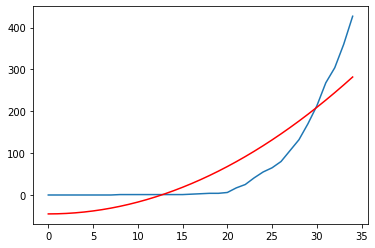

In [44]:
y_pred2 = reg2.predict(Z)
plt.plot(z,y)
plt.plot(z,y_pred2,c='r')

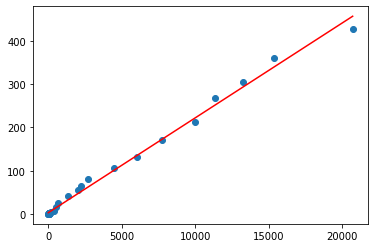

In [45]:
y_pred = reg.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,c='r')

In [46]:
reg.predict([[30000]])

array([[661.36929563]])

In [47]:
mod = SVR(C=200)

In [48]:
mod.fit(z,y)

/Users/louisnot/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louisnot/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
mod.score(z,y)

0.9791742935433497

In [50]:
pred_svr = mod.predict(z)

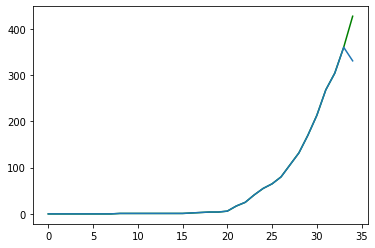

In [51]:
plt.plot(z,y, c='g')
plt.plot(z,pred_svr)